<a href="https://colab.research.google.com/github/IshanRavishankar15/23FE10CSE00641-ML/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Read the used cars dataset from CSV file
data = pd.read_csv("used_cars_data.csv")


In [3]:
# Display the first 5 rows to understand the structure of the dataset
data.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
# Display dataset summary including column names, data types, and non-null counts
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
# Count the number of unique values in each column
# Helps identify categorical vs numerical features
data.nunique()


,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150


In [6]:
# Identify missing (null) values present in each column
data.isnull().sum()


,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [7]:
# Drop 'S.No.' column as it does not contribute to analysis or prediction
data.drop(columns=['S.No.'], inplace=True)

# Verify removal
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
# 'New_Price' has a large number of missing values
# Dropping it avoids unreliable imputation
data.drop(columns=['New_Price'], inplace=True)


In [13]:
# Convert Mileage column to numeric (ignores text safely)
data['Mileage'] = pd.to_numeric(data['Mileage'], errors='coerce')


In [14]:
# Convert Engine column to numeric
data['Engine'] = pd.to_numeric(data['Engine'], errors='coerce')


In [15]:
# Convert Power column to numeric
data['Power'] = pd.to_numeric(data['Power'], errors='coerce')


In [16]:
# Fill missing numeric values with median
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())


In [17]:
# Convert object columns to categorical type
cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].astype('category')


In [18]:
# Create Car_Age feature from manufacturing year
data['Car_Age'] = 2025 - data['Year']


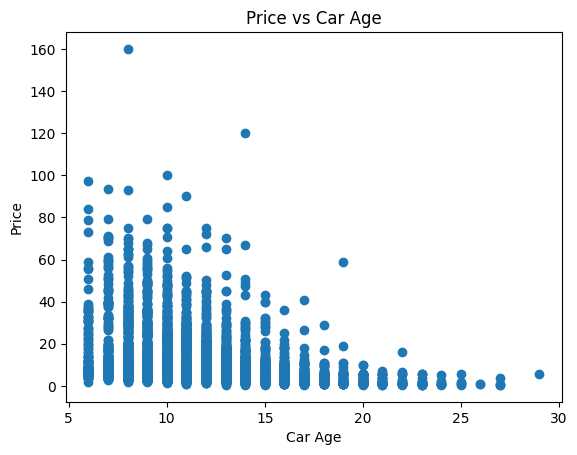

In [22]:
# Relationship between car age and price
plt.scatter(data['Car_Age'], data['Price'])
plt.xlabel("Car Age")
plt.ylabel("Price")
plt.title("Price vs Car Age")
plt.show()


/tmp/ipython-input-1722938801.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_fuel = data.groupby('Fuel_Type')['Price'].mean()


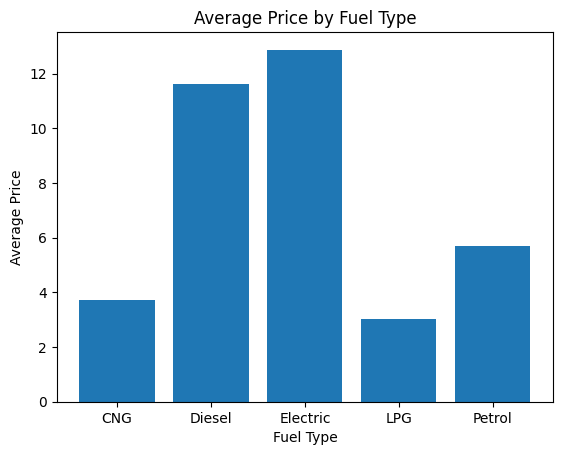

In [23]:
# Average price for each fuel type
avg_price_fuel = data.groupby('Fuel_Type')['Price'].mean()

plt.bar(avg_price_fuel.index, avg_price_fuel.values)
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.title("Average Price by Fuel Type")
plt.show()


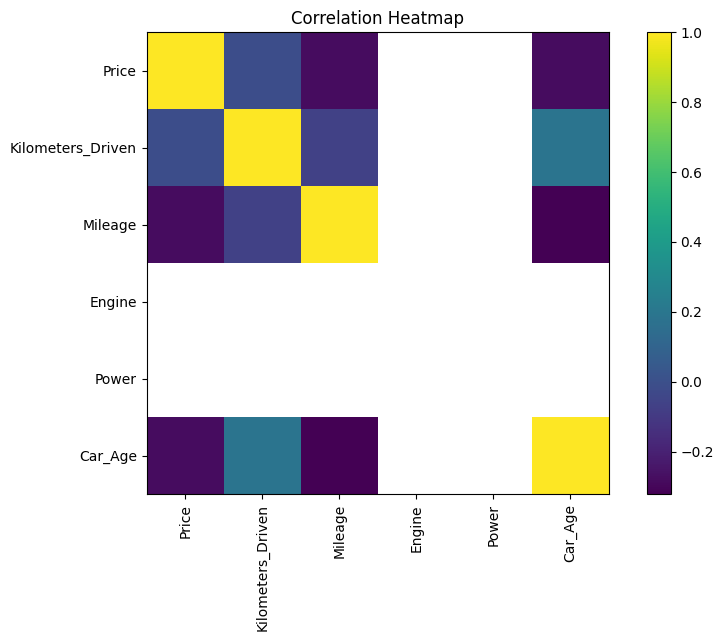

In [25]:
# Select numerical columns for correlation
num_cols = ['Price', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Car_Age']

# Compute correlation matrix
corr = data[num_cols].corr()

# Plot heatmap using matplotlib
plt.figure(figsize=(10,6))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()
